### Тестовое задание
Даны два числа N и m, 500<N≤1000, 10<m≤50

#### Программа 1 (формирование исходных данных):

По переданным числам N и m заполнить текстовый файл vectors.csv, состоящий из N строк, в каждой из которых m случайных чисел с плавающей точкой, каждое в диапазоне от -1 до +1, разделённых запятыми.

In [1]:
import pandas as pd

In [2]:
import random

In [3]:
N = int(input('Введите число строк в диапазоне: 500 < N ≤ 1000: '))
m = int(input('Введите число компонент в векторе в диапазоне: 10 < m ≤ 50: '))

Введите число строк в диапазоне: 500 < N ≤ 1000: 1000
Введите число компонент в векторе в диапазоне: 10 < m ≤ 50: 50


In [4]:
pd.DataFrame(data={col:[random.uniform(-1, 1) for i in range(N)] for col in range(m)}).to_csv('vectors.csv', index=False, header=False)

#### Программа 2 (основное задание):

На вход подаётся файл vectors.csv, созданный Программой 1. Каждая строка файла рассматривается как m-мерный вектор. Таким образом, получаем N векторов. Требуется вычислить евклидово расстояние между всеми парами различных векторов этого списка, и найти минимальное и максимальное расстояния, а также распределение расстояний.

Дополнительное требование по использованию памяти: недопустимо создавать структуры данных размером более N x m элементов (больше, чем размер входного списка векторов).

Результат выводится в виде:

· номера векторов пары с минимальным расстоянием, и значение этого расстояния;

· номера векторов пары с максимальным расстоянием, и значение этого расстояния;

· изображение гистограммы распределения расстояний с шагом 0.1.

In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
from matplotlib import pyplot as plt
from pylab import rcParams

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [8]:
df = pd.read_csv('vectors.csv', header=None, sep=',')
df.size

50000

#### способ 1

In [9]:
%%time
df1 = {}
for i in range(len(df)-1):
    for j in range(i+1, len(df)):
        df1[(i, j)] = np.linalg.norm(df.loc[i]-df.loc[j])

Wall time: 2min 3s


In [10]:
len(df1.values())

499500

In [11]:
print(f'Пара векторов %d и %d имеет минимальное расстояние %.3f' % 
      (list(df1.keys())[list(df1.values()).index(min(list(df1.values())))][0], 
       list(df1.keys())[list(df1.values()).index(min(list(df1.values())))][1], 
       min(list(df1.values()))))

Пара векторов 373 и 936 имеет минимальное расстояние 3.384


In [12]:
print(f'Пара векторов %d и %d имеет максимальное расстояние %.3f' % 
      (list(df1.keys())[list(df1.values()).index(max(list(df1.values())))][0], 
       list(df1.keys())[list(df1.values()).index(max(list(df1.values())))][1], 
       max(list(df1.values()))))

Пара векторов 806 и 994 имеет максимальное расстояние 7.699


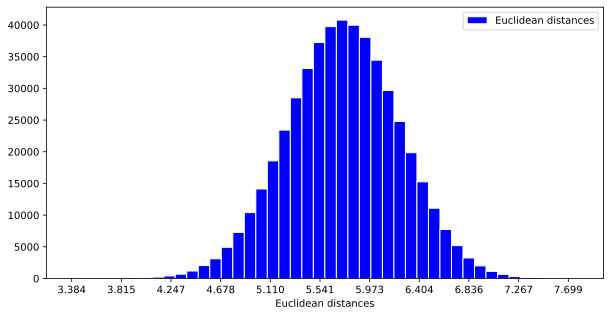

Wall time: 1.89 s


In [13]:
%%time
rcParams["figure.figsize"] = 10, 5
plt.hist(df1.values(), 
         bins=np.arange(min(list(df1.values())), 
                        max(list(df1.values())) + 0.1, 
                        0.1), 
         color="blue", ec="white", label="Euclidean distances")
plt.xlabel("Euclidean distances")
plt.axis()
plt.xticks(np.arange(min(list(df1.values())), 
                     max(list(df1.values())) + 0.1, 
                     (max(list(df1.values())) - min(list(df1.values()))) / 10))

plt.legend()
plt.show()

#### способ 2

In [14]:
%%time
df2 = pd.Series(data={(i, j): np.linalg.norm(df.loc[i]-df.loc[j]) for i in range(len(df)-1) for j in range(i+1, len(df))})

Wall time: 2min 7s


In [15]:
df2.size

499500

In [16]:
print(f'Пара векторов %d и %d имеет минимальное расстояние %.3f' % 
      (df2.index[df2 == df2.min()].values[0][0], 
       df2.index[df2 == df2.min()].values[0][1], 
       df2[df2 == df2.min()].values[0]))

Пара векторов 373 и 936 имеет минимальное расстояние 3.384


In [17]:
print(f'Пара векторов %d и %d имеет максимальное расстояние %.3f' % 
      (df2.index[df2 == df2.max()].values[0][0], 
       df2.index[df2 == df2.max()].values[0][1], 
       df2[df2 == df2.max()].values[0]))

Пара векторов 806 и 994 имеет максимальное расстояние 7.699


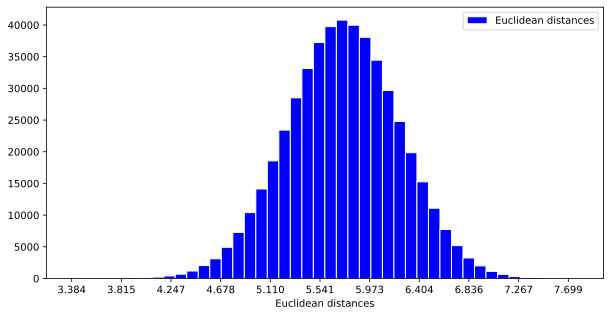

Wall time: 254 ms


In [18]:
%%time
rcParams["figure.figsize"] = 10, 5
plt.hist(df2, bins=np.arange(df2[df2 == df2.min()].values[0], 
                             df2[df2 == df2.max()].values[0] + 0.1, 
                             0.1), 
         color="blue", ec="white", label="Euclidean distances")
plt.xlabel("Euclidean distances")
plt.axis()
plt.xticks(np.arange(df2[df2 == df2.min()].values[0], 
                     df2[df2 == df2.max()].values[0] + 0.1, 
                     (df2[df2 == df2.max()].values[0] - df2[df2 == df2.min()].values[0]) / 10))

plt.legend()
plt.show()

#### способ 3

In [19]:
%%time
df3 = pd.DataFrame(data={'vec1': [(i, j)[0] for i in range(len(df)-1) for j in range(i+1, len(df))], 
                         'vec2': [(i, j)[1] for i in range(len(df)-1) for j in range(i+1, len(df))], 
               'euclidean_dist': [np.linalg.norm(df.loc[i]-df.loc[j]) for i in range(len(df)-1) for j in range(i+1, len(df))]})

Wall time: 2min 11s


In [20]:
df3.size

1498500

In [21]:
print(f'Пара векторов %d и %d имеет минимальное расстояние %.3f' % 
      (df3[df3['euclidean_dist'] == df3['euclidean_dist'].min()].values[0][0], 
       df3[df3['euclidean_dist'] == df3['euclidean_dist'].min()].values[0][1], 
       df3[df3['euclidean_dist'] == df3['euclidean_dist'].min()].values[0][2]))

Пара векторов 373 и 936 имеет минимальное расстояние 3.384


In [22]:
print(f'Пара векторов %d и %d имеет максимальное расстояние %.3f' % 
      (df3[df3['euclidean_dist'] == df3['euclidean_dist'].max()].values[0][0], 
       df3[df3['euclidean_dist'] == df3['euclidean_dist'].max()].values[0][1], 
       df3[df3['euclidean_dist'] == df3['euclidean_dist'].max()].values[0][2]))

Пара векторов 806 и 994 имеет максимальное расстояние 7.699


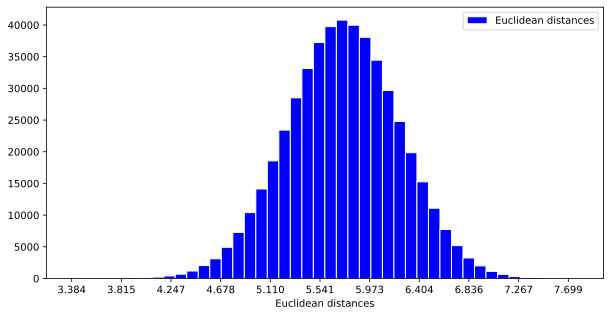

Wall time: 256 ms


In [23]:
%%time
rcParams["figure.figsize"] = 10, 5
plt.hist(df3['euclidean_dist'].values, 
         bins=np.arange(df3[df3['euclidean_dist'] == df3['euclidean_dist'].min()].values[0][2], 
                        df3[df3['euclidean_dist'] == df3['euclidean_dist'].max()].values[0][2] + 0.1, 
                        0.1), 
         color="blue", ec="white", label="Euclidean distances")
plt.xlabel("Euclidean distances")
plt.axis()
plt.xticks(np.arange(df3[df3['euclidean_dist'] == df3['euclidean_dist'].min()].values[0][2], 
                     df3[df3['euclidean_dist'] == df3['euclidean_dist'].max()].values[0][2] + 0.1, 
                     (df3[df3['euclidean_dist'] == df3['euclidean_dist'].max()].values[0][2] - df3[df3['euclidean_dist'] == df3['euclidean_dist'].min()].values[0][2]) / 10))

plt.legend()
plt.show()